2024-12-13 08:50:50.484683: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/antoine/PycharmProjects/tensorflow_workshop/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 3935 images belonging to 2 classes.
Found 985 images belonging to 2 classes.


/Users/antoine/PycharmProjects/tensorflow_workshop/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/antoine/PycharmProjects/tensorflow_workshop/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.6158 - loss: 0.6383

/Users/antoine/PycharmProjects/tensorflow_workshop/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


123/123 ━━━━━━━━━━━━━━━━━━━━ 88s 704ms/step - accuracy: 0.6168 - loss: 0.6371 - val_accuracy: 0.9584 - val_loss: 0.1059
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 133s 631ms/step - accuracy: 0.9219 - loss: 0.2007 - val_accuracy: 0.9838 - val_loss: 0.0467
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 79s 643ms/step - accuracy: 0.9626 - loss: 0.0987 - val_accuracy: 0.9959 - val_loss: 0.0214
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 79s 639ms/step - accuracy: 0.9764 - loss: 0.0697 - val_accuracy: 0.9909 - val_loss: 0.0179
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 78s 632ms/step - accuracy: 0.9892 - loss: 0.0464 - val_accuracy: 0.9970 - val_loss: 0.0154


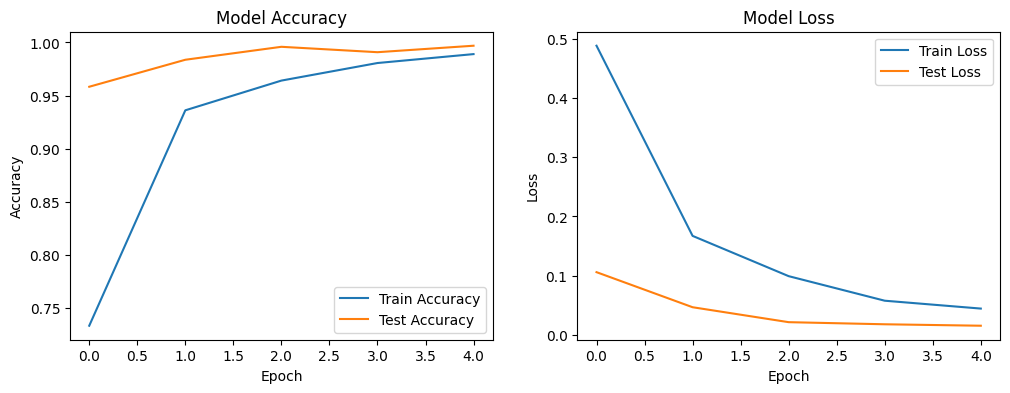

Modèle sauvegardé avec succès.


NameError: name 'message' is not defined

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import random
import shutil

base_dir = 'Images'

train_dir = 'train'
test_dir = 'test'

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

os.makedirs(os.path.join(train_dir, 'glasses'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'no_glasses'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'glasses'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'no_glasses'), exist_ok=True)

def split_dataset(source_dir, train_dir, test_dir, split_ratio=0.8):
    for class_name in ['glasses', 'no_glasses']:
        source_class_dir = os.path.join(base_dir, class_name)
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)

        images = [
            img_name for img_name in os.listdir(source_class_dir)
            if os.path.isfile(os.path.join(source_class_dir, img_name)) and not img_name.startswith('.')
        ]
        random.shuffle(images)

        split_idx = int(len(images) * split_ratio)
        train_images = images[:split_idx]
        test_images = images[split_idx:]

        for img_name in train_images:
            src_path = os.path.join(source_class_dir, img_name)
            dest_path = os.path.join(train_class_dir, img_name)
            shutil.copy(src_path, dest_path)

        for img_name in test_images:
            src_path = os.path.join(source_class_dir, img_name)
            dest_path = os.path.join(test_class_dir, img_name)
            shutil.copy(src_path, dest_path)

split_dataset(base_dir, train_dir, test_dir)

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_datagen = ImageDataGenerator(rescale=1./255)

def clean_checkpoints(directory):
    for root, dirs, _ in os.walk(directory):
        for dir_name in dirs:
            if dir_name == ".ipynb_checkpoints":
                shutil.rmtree(os.path.join(root, dir_name))


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.save("glasses_classification_model.h5")
print("Modèle sauvegardé avec succès.")

message.txt